In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import( Conv2D,MaxPooling2D,Dense,Dropout,Flatten,BatchNormalization)
from tensorflow.keras.models import Sequential
from keras.utils.np_utils import  to_categorical
import joblib

In [3]:
test=pd.read_csv("E:/2336120046/datasets/test.csv")
train=pd.read_csv("E:/2336120046/datasets/train.csv")
x_train=train.drop(['label'],axis=1).values
y_train=train['label'].values
x_test=test.values
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
x_train=x_train/255
x_test=x_test/255
y_train=to_categorical(y_train)

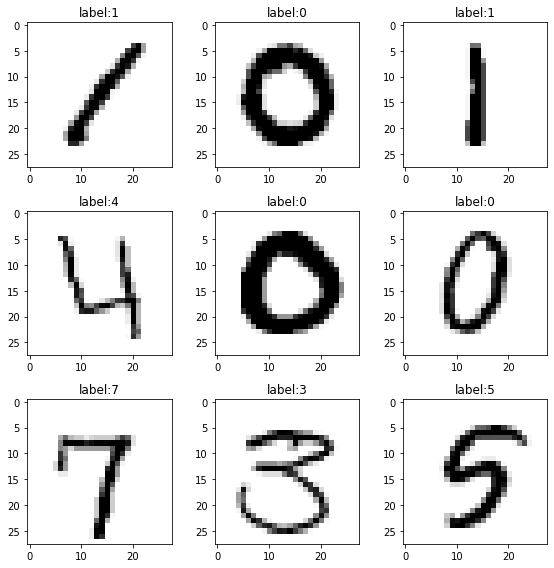

In [4]:
fig,axes=plt.subplots(3,3,figsize=(8,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x_train[i].squeeze(),cmap='binary')
    digit=y_train[i].argmax()
    ax.set(title=f"label:{digit}")
fig.tight_layout()

In [5]:
def get_model():
    model=Sequential()
    model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
    model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
    model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(512,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model
tf.random.set_seed(0)
model=get_model()
print(model.summary())
    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         1

In [6]:
history=model.fit(x_train,y_train,batch_size=64,epochs=20,validation_split=0.2)
tf.keras.models.save_model(model,"models/mnist_cnn.hs")

Epoch 1/20
525/525 [==============================] - 82s 150ms/step - loss: 0.1055 - accuracy: 0.9682 - val_loss: 0.1025 - val_accuracy: 0.9680
Epoch 2/20
525/525 [==============================] - 80s 152ms/step - loss: 0.0446 - accuracy: 0.9863 - val_loss: 0.0544 - val_accuracy: 0.9858
Epoch 3/20
525/525 [==============================] - 82s 155ms/step - loss: 0.0361 - accuracy: 0.9889 - val_loss: 0.0452 - val_accuracy: 0.9879
Epoch 4/20
525/525 [==============================] - 77s 147ms/step - loss: 0.0253 - accuracy: 0.9920 - val_loss: 0.0712 - val_accuracy: 0.9856
Epoch 5/20
525/525 [==============================] - 77s 147ms/step - loss: 0.0227 - accuracy: 0.9930 - val_loss: 0.0410 - val_accuracy: 0.9904
Epoch 6/20
525/525 [==============================] - 77s 147ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0353 - val_accuracy: 0.9923
Epoch 7/20
525/525 [==============================] - 77s 147ms/step - loss: 0.0179 - accuracy: 0.9944 - val_loss: 0.0498 - val_ac

INFO:tensorflow:Assets written to: models/mnist_cnn.hs\assets


INFO:tensorflow:Assets written to: models/mnist_cnn.hs\assets


In [7]:
joblib.dump(history.history,"models/mnist_cnn.history")

['models/mnist_cnn.history']

In [8]:
model=tf.keras.models.load_model("models/mnist_cnn.hs")
history=joblib.load("models/mnist_cnn.history")

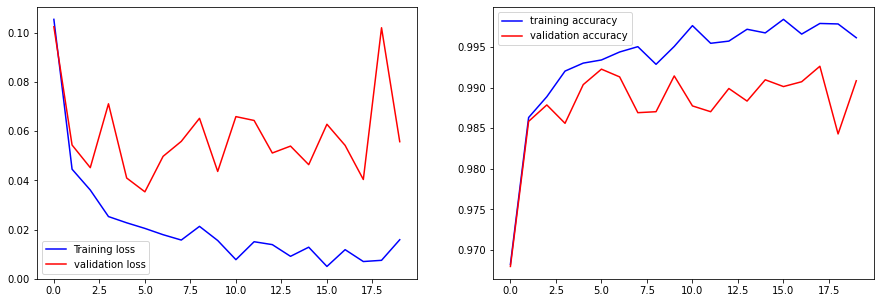

In [13]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].plot(history['loss'],color='b',label="Training loss")
ax[0].plot(history['val_loss'],color='r',label="validation loss",axes=ax[0])
ax[0].legend()

ax[1].plot(history['accuracy'],color='b',label="training accuracy")
ax[1].plot(history['val_accuracy'],color='r',label="validation accuracy")
ax[1].legend()

875/875 [==============================] - 10s 12ms/step


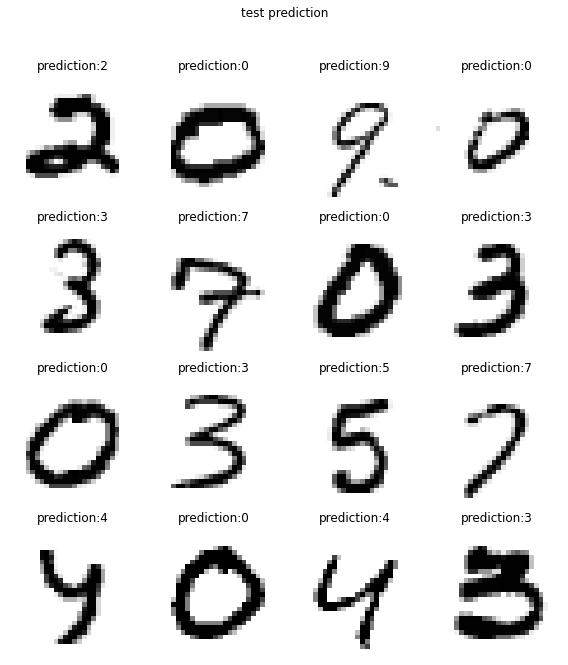

In [19]:
y_pred=model.predict(x_test)
fig,axis=plt.subplots(4,4,figsize=(8,10))
for i,ax in enumerate(axis.flat):
    ax.imshow(x_test[i].squeeze(),cmap='binary')
    ax.set(title=f"prediction:{y_pred[i].argmax()}");
    ax.axis("off")
fig.suptitle("test prediction")
fig.tight_layout(rect=[0,0.05,1,0.95])